In [49]:
import pandas as pd
import numpy as np
import json 
import sys, os, importlib


sys.path.insert(0, os.path.abspath('../'))
import debateorg.loader
import debateorg.processor as processor
import debateorg.properties as prop

importlib.reload(debateorg.loader)
importlib.reload(prop)
importlib.reload(processor)

<module 'debateorg.processor' from 'C:\\Users\\elba_ro\\Documents\\projects\\conf21-style-transfer\\debateorg\\processor.py'>

In [50]:
loader = debateorg.loader.Loader()
_ = loader.get_users()
_ = loader.get_debates()

## Data Overview
#### Parties distribution, ideology distrbution, debate categories

### Political Parties Distribution

<AxesSubplot:title={'center':'Users count for the  Top 20 political parties (Exluding "Not Saying")'}, xlabel='political_party'>

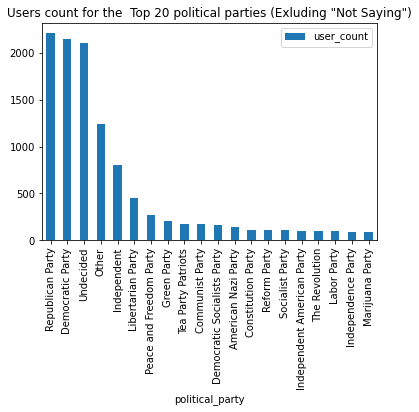

In [20]:
user_politcal_parties_dstr = loader.get_user_political_parties(plot=False)
user_politcal_parties_dstr[user_politcal_parties_dstr.index != 'Not Saying'].head(20).plot(kind='bar', 
                                                                                           title='Users count for the  Top 20 political parties (Exluding "Not Saying")')


### Political Ideologies Distribution

<AxesSubplot:title={'center':'Users count for the  Top 20 ideologies (Exluding "Not Saying")'}, xlabel='ideology'>

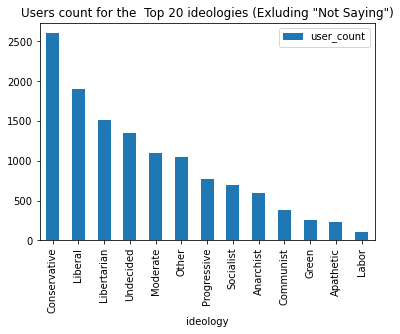

In [21]:
user_ideologies_dstr = loader.get_user_ideologies(plot=False)
user_ideologies_dstr[user_ideologies_dstr.index != 'Not Saying'].head(20).plot(kind='bar',
                                                                               title='Users count for the  Top 20 ideologies (Exluding "Not Saying")')

### Political Parties Distribution

<AxesSubplot:title={'center':'Ideology X Party'}, xlabel='political_ideology'>

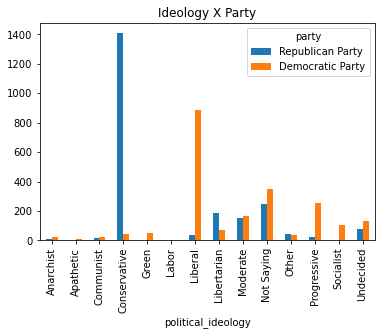

In [22]:
pd.crosstab(loader.users_df.political_ideology, 
            loader.users_df.party)[['Republican Party', 'Democratic Party']].plot(kind='bar',
                                                                                 title='Ideology X Party')
#Not Saying                             33910
#Republican Party                        2210
#Democratic Party                        2151
#Undecided                               2110
#Other                                   1245
#Independent                              802
#Libertarian Party                        449

<AxesSubplot:xlabel='religious_ideology'>

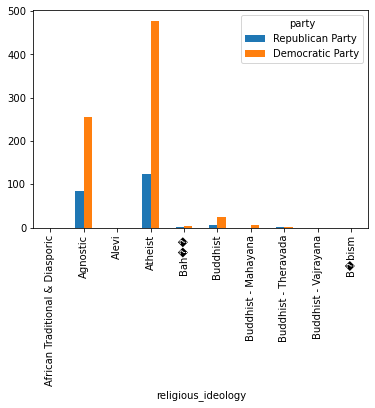

In [23]:
pd.crosstab(loader.users_df.religious_ideology, 
            loader.users_df.party)[['Republican Party', 'Democratic Party']].head(10).plot(kind='bar')

### Debate Categories Distribution

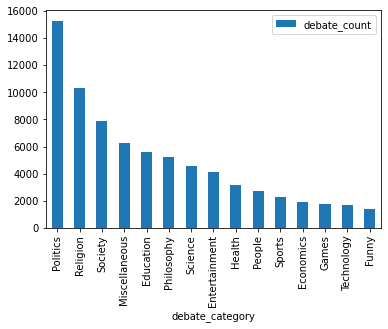

In [24]:
debate_categories_dstr = loader.get_debate_categories(plot=True)

### Discovering Data structure

<AxesSubplot:>

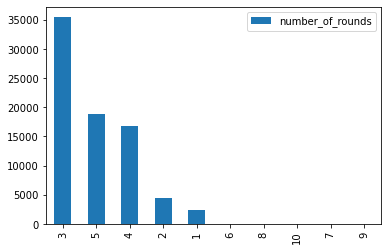

In [25]:
loader.debates_df.number_of_rounds.value_counts().to_frame().head(10).plot(kind= 'bar')

In [44]:
# 1. get liberal and cons users

lib_cons_users_df, liberal_cons_user_ids = loader.get_liberal_conservative_users()
debates_sub_df = loader.get_debates_w_liberal_or_conservative_paticipants()


# of liberal and conservative users 4503
# of liberal and conservative users 4503
# of debates with liberal OR conservative participants:  23160


In [ ]:
IDEOLOGIES = [prop.LIBERAL_IDEOLOGY, prop.CONSERVATIVE_IDEOLOGY]

print('debates where at least p1 or p2 is conservative or liberal',
      len(debate_vote_df['debate_id'].unique()) )

print('debates where at  p1-p2 are a conservative- liberal pair',
      len(debate_vote_df[(debate_vote_df['p1_ideology'].isin(IDEOLOGIES)) & \
                          (debate_vote_df['p2_ideology'].isin(IDEOLOGIES)) & \
                        (debate_vote_df['p1_ideology'] != debate_vote_df['p2_ideology'])]['debate_id'].unique()))


print('debates where p1 ideology is diff than p2:',
      len(debate_vote_df[debate_vote_df['p1_ideology'] != debate_vote_df['p2_ideology']]['debate_id'].unique()))


#debates where at least p1 or p2 is conservative or liberal 46018
#debates where at  p1-p2 are a conservative- liberal pair 983
#debates where p1 ideology is diff than p2: 36184

In [ ]:
changing_debates =before_after_change_df['debate_id'].unique().tolist()
changing_debates

In [ ]:
before_after_change_df['category'].value_counts().to_frame().plot(kind='bar')

In [ ]:
# the voter is lib/cons AND 
#  they changed their mind before and after
before_after_change_df.head()

In [125]:
import deateorg.processor as processor



debate_vote_df = processor.get_debates_w_effect()

## check GENERAL BEFORE AFTER AGREEMENT

In [126]:
def plot_effect_dstr(df, title='' ):
    counts_df = df['effect'].value_counts().to_frame()
    counts_df.plot(kind='bar', title=title)
    

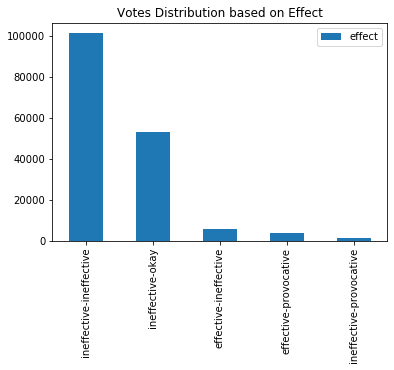

In [127]:
plot_effect_dstr(debate_vote_df, title='Votes Distribution based on Effect')

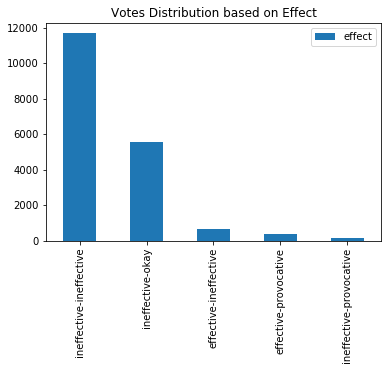

In [128]:
plot_effect_dstr(debate_vote_df[debate_vote_df['voter_ideology'] == LIBERAL_IDEOLOGY], 
                 title='Votes Distribution based on Effect')

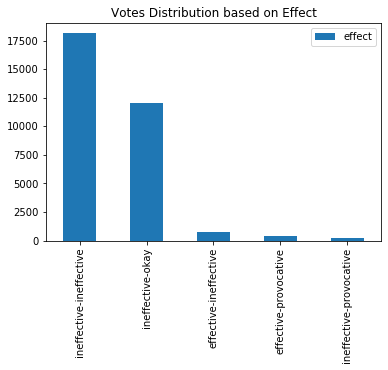

In [129]:
plot_effect_dstr(debate_vote_df[debate_vote_df['voter_ideology'] == CONSERVATIVE_IDEOLOGY], 
                 title='Votes Distribution based on Effect')

## check when before and after agreement has changed

In [ ]:
before_after_change_df.columns.tolist()

In [131]:
#before_after_change_df['p1_effect'].value_counts()

In [ ]:
before_after_change_df['p2_effect'].value_counts().to_frame()#.plot(kind='bar')

In [ ]:
before_after_change_df['effect'].value_counts().to_frame()#.plot(kind='bar')

In [ ]:
before_after_change_df[before_after_change_df['voter_ideology'] == 'Liberal']['effect'].value_counts().to_frame()#.plot(kind='bar')

In [ ]:
before_after_change_df[before_after_change_df['voter_ideology'] == 'Conservative']['effect'].value_counts().to_frame()#.plot(kind='bar')

## Setting A - Interaction between Liberal Voter and Conservative articipant or Vice versa

In [ ]:
# Setting A [restricted]
#   argument from conservative, voted by liberal (or vice versa)
def _add_lib_cons_interaction(row):
    interactions = []
    opposite = CONSERVATIVE_IDEOLOGY if row['voter_ideology'] == LIBERAL_IDEOLOGY else LIBERAL_IDEOLOGY
    if row['p1_ideology'] == opposite:
        interactions.append('p1')
    if row['p2_ideology'] == opposite:
        interactions.append('p2')
    row['interaction'] = ','.join(interactions)
    return row
    
liberal_restricted_df = debate_vote_df[(debate_vote_df['voter_ideology'] == LIBERAL_IDEOLOGY) & \
                                     ( (debate_vote_df['p1_ideology'] == CONSERVATIVE_IDEOLOGY) | \
                                      (debate_vote_df['p2_ideology'] == CONSERVATIVE_IDEOLOGY))  ]


conservative_restricted_df = debate_vote_df[(debate_vote_df['voter_ideology'] == CONSERVATIVE_IDEOLOGY) & \
                                     ( (debate_vote_df['p1_ideology'] == LIBERAL_IDEOLOGY) | \
                                      (debate_vote_df['p2_ideology'] == LIBERAL_IDEOLOGY))  ]


liberal_restricted_df = liberal_restricted_df.apply(_add_lib_cons_interaction, axis = 1)
conservative_restricted_df = conservative_restricted_df.apply(_add_lib_cons_interaction, axis = 1)

In [ ]:
len(conservative_restricted_df)

In [ ]:
conservative_restricted_df['interaction'].value_counts()

In [ ]:
liberal_restricted_df['interaction'].value_counts()

In [ ]:
liberal_restricted_df.columns.tolist()

In [ ]:
liberal_restricted_df.head()

In [133]:
def get_liberal_conservative_flat(df):
    # each row should be voter with a participant
    result = []
    for i, row in df.iterrows():

        info = {}
        info['debate_id'] = row['debate_id']
        info['category'] = row['category']
        
        info['voter_username'] = row['voter_username']
        info['voter_ideology'] = row['voter_ideology']
        
        for participant in row['interaction'].split(','):
            single_inter = info
            single_inter['p_ideology'] = row['{}_ideology'.format(participant)]
            
            single_inter['p_name'] = row['{}_name'.format(participant)]
            
            single_inter['p_agree_before'] = row['{}_agree_before'.format(participant)]
            single_inter['p_agree_after'] = row['{}_agree_after'.format(participant)]
            single_inter['p_convincing'] = row['{}_convincing'.format(participant)]
            single_inter['p_effect'] = row['{}_effect'.format(participant)]
            result.append(single_inter.copy())
    return pd.DataFrame(result)
            

In [ ]:
liberal_restricted_dataset = get_liberal_conservative_flat(liberal_restricted_df)

In [ ]:
conservative_restricted_dataset = get_liberal_conservative_flat(conservative_restricted_df)

In [ ]:
liberal_restricted_dataset['p_effect'].value_counts()

In [ ]:
conservative_restricted_dataset['p_effect'].value_counts()

## Setting B - Interaction between Liberal/Cons Voter and other_ideology participant or Vice versa

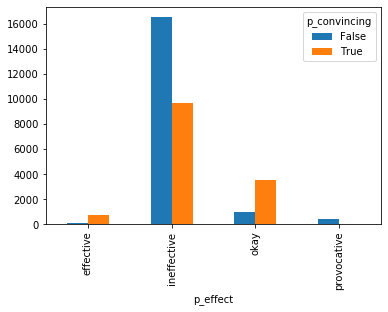

In [139]:
pd.crosstab(liberal_dataset['p_effect'], liberal_dataset['p_convincing']).plot(kind='bar')

In [193]:
cons_debate_effect[cons_debate_effect['id'] == 'Civil-Disobedience-is-appropriate-in-the-fight-for-justice/1/']
d_id = 'Believing-Own-Hallucinations-Insane-What-Are-Billions-Who-Believe-Others-Hallucinations-Are-True/1/'
loader.debates_df.loc[d_id].rounds


[[{'side': 'Pro',
   'text': '\n  \n   Many people are committed to mental health institutions who act on their own hallucinations, because they believed them to be Real.  \n  \r\nYet, Billions of people on Planet Earth believe the Hallucinations of Abraham, Moses, Joshua, Solomon, etc... to be Absolute Truth.  \r\nThese include: Jews, Christians and Muslims.   \n  \n   '}]]

In [200]:
#cons_debate_effect, cons_not_found_args_df = get_debates_with_overlaping_effect(conservative_dataset, flatten=True)
lib_debate_effect, lib_not_found_args_df = get_debates_with_overlaping_effect(liberal_dataset, flatten=True)

In [201]:
cons_debate_effect.to_csv('../data/conservative_debate_arguments_w_effect.csv')
lib_debate_effect.to_csv('../data/liberal_debate_arguments_w_effect.csv')

In [203]:
cons_debate_effect['effect'].value_counts()

ineffective    97629
okay           18806
effective       3142
provocative      988
Name: effect, dtype: int64

In [ ]:
lib_debate_effect['effect'].value_counts()
lib_debate_effect.head(1)

In [ ]:
loader.debates_df.index[0]

In [ ]:
pd.crosstab(lib_debate_effect['effect'], lib_debate_effect['category']).T['effective'].plot(kind='bar')

In [ ]:
pd.crosstab(cons_debate_effect['effect'], cons_debate_effect['category']).T[['ineffective', 'effective']].plot(kind='bar')

In [ ]:
len(lib_debate_effect) #7822
lib_debate_effect.head(2)

In [ ]:
len(cons_debate_effect) # 10139
cons_debate_effect.head(2)

In [204]:
len(cons_not_found_args_df)

35257

In [211]:
cons_not_found_args_df.dropna(inplace=True)
lib_not_found_args_df.dropna(inplace=True)
cons_not_found_args_df.to_csv('../data/conservative_not_found_arguments.csv')
lib_not_found_args_df.to_csv('../data/liberal_not_found_arguments.csv')

In [212]:
cons_not_found_args_df

,debate_id,participant,rounds
3369,Believing-Own-Hallucinations-Insane-What-Are-B...,gryephon,"[[{'side': 'Pro', 'text': ' Many people ..."
4779,Civil-Disobedience-is-appropriate-in-the-fight...,g713,"[[{'side': 'Con', 'text': ' CD is never ap..."
6076,Do-Monsters-exist/2/,TheJuniorVarsityNovice,"[[{'side': 'Pro', 'text': ' Monsters do e..."
6437,Does-God-exist/4/,Puck,"[[{'side': 'Pro', 'text': ' In the beginni..."
8579,Gay-marriage-should-be-illegal./1/,Advidoct,"[[{'side': 'Con', 'text': ' I extend this ..."
9268,God-hates-you/1/,TheBuddhist2468,"[[{'side': 'Pro', 'text': ' Yes, I am an ..."
9701,Gun-Control-is-Good/1/,visionsofdylan,"[[{'side': 'Con', 'text': ' I'll keep my f..."
12241,Is-Global-Warming-man-made-and-Can-we-stop-it/1/,stand4something,"[[{'side': 'Con', 'text': ' Do you believe..."
13371,It-is-appropriate-to-use-animals-for-medical-o...,PolicyDb8r,"[[{'side': 'Con', 'text': ' First of all, ..."
19158,Reprsentation-by-population-is-not-the-best-fo...,TheLibertarian,"[[{'side': 'Con', 'text': ' One of democra..."


In [213]:
len(lib_not_found_args_df)

14

In [214]:
lib_not_found_args_df

,debate_id,participant,rounds
393,AOW-War-Scenario-Kazakhstan-pro-vs-Afghanistan...,Russia_The_almighty,"[[{'side': 'Pro', 'text': ' This is a war ..."
4083,Does-God-exist/4/,Puck,"[[{'side': 'Pro', 'text': ' In the beginni..."
4257,Donkies-should-not-wear-straw-hats/1/,Dazza01,"[[{'side': 'Con', 'text': ' It might make ..."
5467,Gay-marriage-should-be-illegal./1/,Advidoct,"[[{'side': 'Con', 'text': ' I extend this ..."
5989,God-hates-you/1/,TheBuddhist2468,"[[{'side': 'Pro', 'text': ' Yes, I am an ..."
8507,Islam-Religion-Should-Be-Condemned/1/,MagicAintReal,"[[{'side': 'Pro', 'text': ' Personally, I ..."
8608,It-is-appropriate-to-use-animals-for-medical-o...,PolicyDb8r,"[[{'side': 'Con', 'text': ' First of all, ..."
12629,Resolved-Jupiter-is-not-a-Planet./1/,TheJuniorVarsityNovice,"[[{'side': 'Pro', 'text': ' This debate i..."
12919,Resolved-There-were-no-time-travel-plot-holes-...,ryanstarwars,"[[{'side': 'Con', 'text': ' The first time..."
15395,That-the-Economic-Stimulus-Act-will-successful...,Mz.Independent,"[[{'side': 'Con', 'text': ' Learning exper..."
